# EXPLORATORY DATA ANALYSIS-INDIAN PREMIER LEAGUE

## AUTHOR:ANUSHA VL


### Data Science and Business Analytics

### GRIP @ The Sparks Foundation

### Task #5 : Exploratory Data Analysis : Sports (Indian Premier League)

#### Problem Statement:

- Find out the most successful teams, players and factors contributing win or loss of a team.
- Suggest teams or players a company should endorse for its products.

## 1. Import the Libraries and Warnings

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##  2. Reading Dataset and Cleaning

In [71]:
#  Read matches.csv file

df = pd.read_csv("matches.csv") 

In [72]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [73]:
# check rows and columns of dataframe
df.shape

(756, 18)

In [74]:
# print the information of variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [75]:
# check statistical summary 
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


**Observations:**

- The provided .csv file contains information on IPL matches spanning from the 2008 season to 2019.
- 75% of the victorious teams won by a margin of 19 runs.
- 75% of the victorious teams won by a margin of 6 wickets.
- In total, there were 756 IPL matches held during this period.

In [76]:
#  Read deliveries.csv file
df1 = pd.read_csv("deliveries.csv") 

In [77]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [78]:
# check rows and columns of dataframe
df1.shape

(179078, 21)

In [79]:
# print the information of variables 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [80]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## 3. Data Merging

In [81]:
#merge two data sets using left join
ipl = pd.merge(df, df1, left_on='id', right_on='match_id', how='left')

ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [82]:
ipl.shape

(179078, 39)

### Handling Missing values 

In [83]:
# check for missing values in df
df.isnull().mean()*100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

In [84]:
# As umpire3 has 84% of missinf values we can drop that column
df.drop("umpire3",axis=1,inplace=True)

In [85]:
# check df again
df.isnull().mean()*100

id                 0.000000
season             0.000000
city               0.925926
date               0.000000
team1              0.000000
team2              0.000000
toss_winner        0.000000
toss_decision      0.000000
result             0.000000
dl_applied         0.000000
winner             0.529101
win_by_runs        0.000000
win_by_wickets     0.000000
player_of_match    0.529101
venue              0.000000
umpire1            0.264550
umpire2            0.264550
dtype: float64

#### Handling Missing values for city column

In [86]:
df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [87]:
# As city is related to venue we can check for which venue city is null
df[df.city.isnull()]['venue']

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

So we found that for Dubai International Cricket Stadium city is null.so we can impute city with "Dubai"

In [88]:
df["city"].fillna("Dubai",inplace=True)

In [89]:
df.city.isnull().sum()

0

#### Handling winner & player_of_match column

In [90]:
df[df.winner.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [91]:
df[df.player_of_match.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


Upon inspection, it was discovered that the fields for the winner and player of the match were null, indicating that the match result had not been announced. This could be attributed to factors such as adverse weather conditions, specifically rain, or technical malfunctions, leading to the delay in declaring the match outcome

so we can just drop the na entries of these columns

In [92]:
# Drop entries which are null
df = df.dropna(subset=['player_of_match', 'winner'])

In [93]:
# check df 
df.isnull().mean()*100

id                 0.000000
season             0.000000
city               0.000000
date               0.000000
team1              0.000000
team2              0.000000
toss_winner        0.000000
toss_decision      0.000000
result             0.000000
dl_applied         0.000000
winner             0.000000
win_by_runs        0.000000
win_by_wickets     0.000000
player_of_match    0.000000
venue              0.000000
umpire1            0.265957
umpire2            0.265957
dtype: float64

In [94]:
#### Change data type of date
df.date=pd.to_datetime(df['date'])

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               752 non-null    int64         
 1   season           752 non-null    int64         
 2   city             752 non-null    object        
 3   date             752 non-null    datetime64[ns]
 4   team1            752 non-null    object        
 5   team2            752 non-null    object        
 6   toss_winner      752 non-null    object        
 7   toss_decision    752 non-null    object        
 8   result           752 non-null    object        
 9   dl_applied       752 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      752 non-null    int64         
 12  win_by_wickets   752 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            752 non-null    object   

In [96]:
# check for null values for df1
df1.isnull().mean()*100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

As 'player_dismissed','fielder' has more than 95% of values missing we can drop these columns.

In [97]:
# drop high null values
df1.drop(['player_dismissed','fielder'],axis=1,inplace=True)

In [98]:
df1.isnull().mean()*100

match_id           0.000000
inning             0.000000
batting_team       0.000000
bowling_team       0.000000
over               0.000000
ball               0.000000
batsman            0.000000
non_striker        0.000000
bowler             0.000000
is_super_over      0.000000
wide_runs          0.000000
bye_runs           0.000000
legbye_runs        0.000000
noball_runs        0.000000
penalty_runs       0.000000
batsman_runs       0.000000
extra_runs         0.000000
total_runs         0.000000
dismissal_kind    95.066954
dtype: float64

**Now that the data set has been cleaned up, let's do the in-depth analysis using visualization**

## 4. DATA VISUALIZATION

### Number of Matches Played in Each IPL season

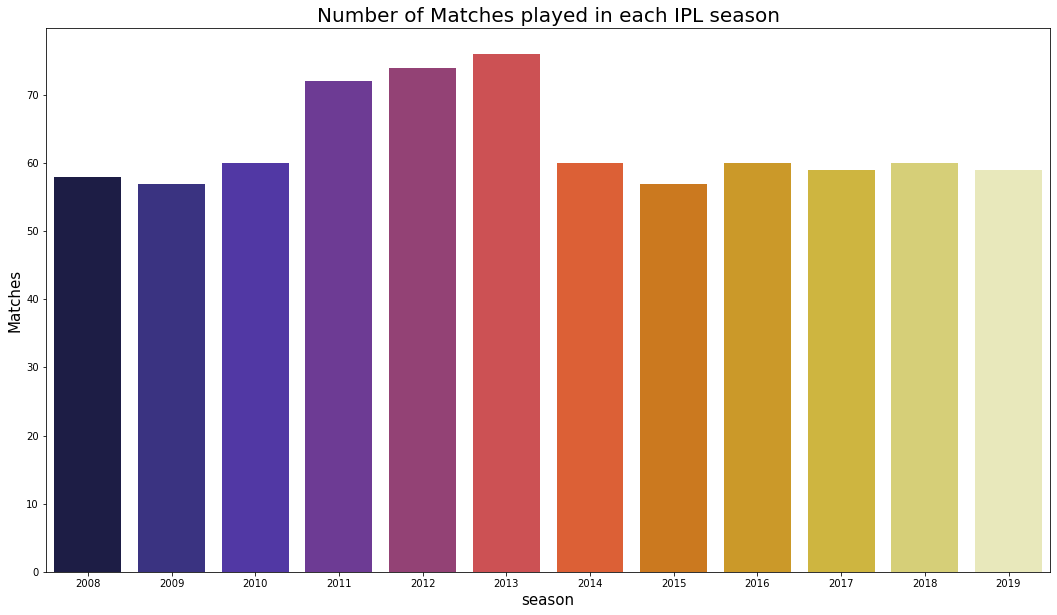

In [99]:
plt.figure(figsize = (18,10))
sns.countplot('season',data=df,palette="CMRmap")
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

- Maximum number of matches played in 2011,2012 and 2013 with 2013 highest with 76 matches

### Number of Teams Played in Each IPL season

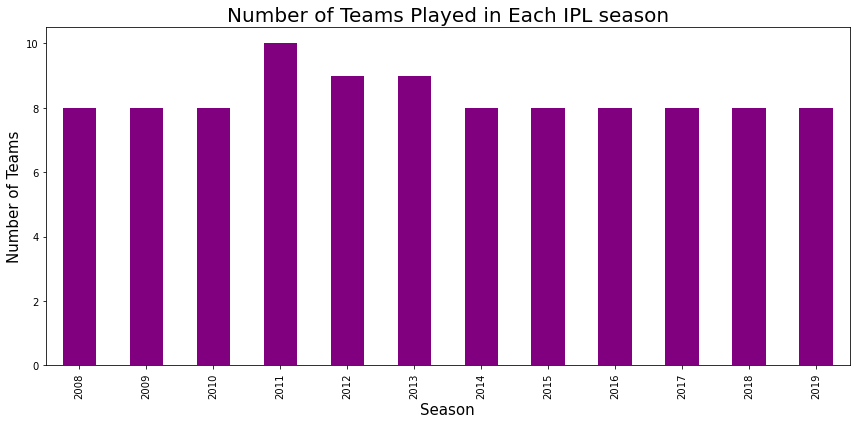

In [100]:
teams_Season = df.groupby('season')['team1'].nunique()
plt.figure(figsize=(12, 6))
teams_Season.plot(kind='bar',color='purple')
plt.title('Number of Teams Played in Each IPL season', size=20)
plt.xlabel('Season', size=15)
plt.ylabel('Number of Teams', size=15)
plt.tight_layout()
plt.show()


- Maximum number of teams participated in 2011(10) followed by 2012 and 2013
- 8 Teams participated in rest of the seasons

### Number of matches played by each team

In [101]:
match_played=(df.team1.value_counts()+df.team2.value_counts()).sort_values(ascending=False)

In [102]:
match_played_df=pd.DataFrame({"Teams":match_played.index.to_list(),"Matches Played":list(match_played.values)})
match_played_df

,Teams,Matches Played
0,Mumbai Indians,187
1,Kolkata Knight Riders,178
2,Royal Challengers Bangalore,177
3,Kings XI Punjab,176
4,Chennai Super Kings,164
5,Delhi Daredevils,159
6,Rajasthan Royals,145
7,Sunrisers Hyderabad,108
8,Deccan Chargers,75
9,Pune Warriors,45


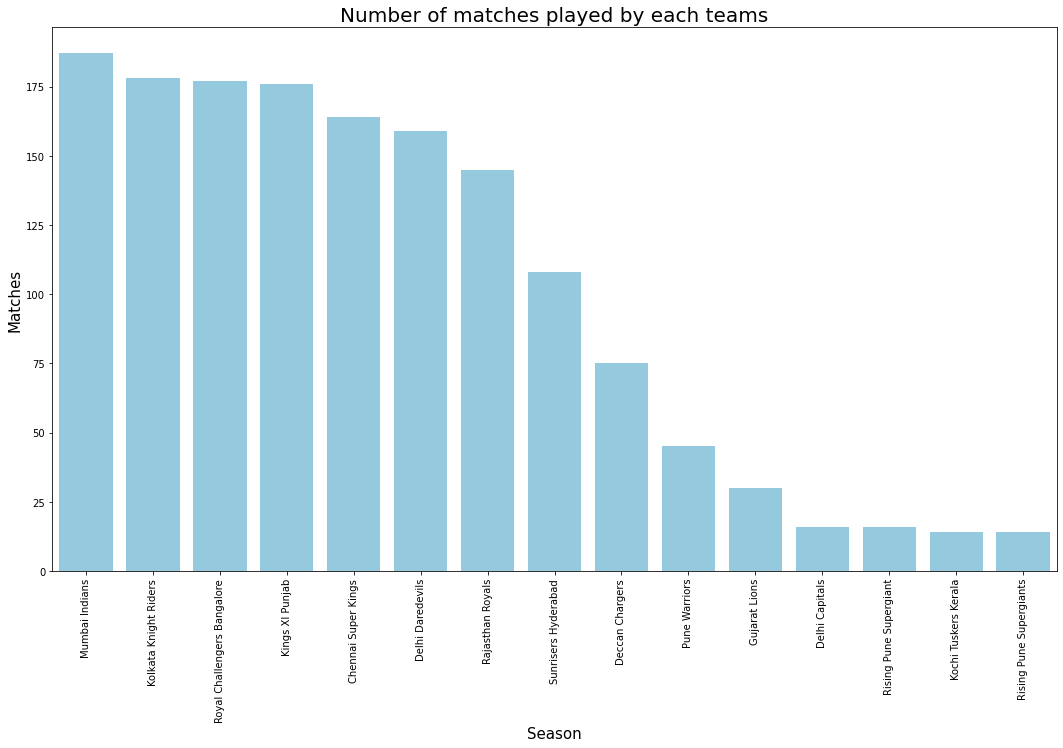

In [103]:
plt.figure(figsize = (18,10))
sns.barplot(x='Teams',y='Matches Played',color='skyblue',data=match_played_df)
plt.title("Number of matches played by each teams",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.xticks(rotation=90)
plt.show()

- Mumbai Indians has played maximum number of IPL matches followed by Kolkata Knight Riders

### Matches Won by Each Team

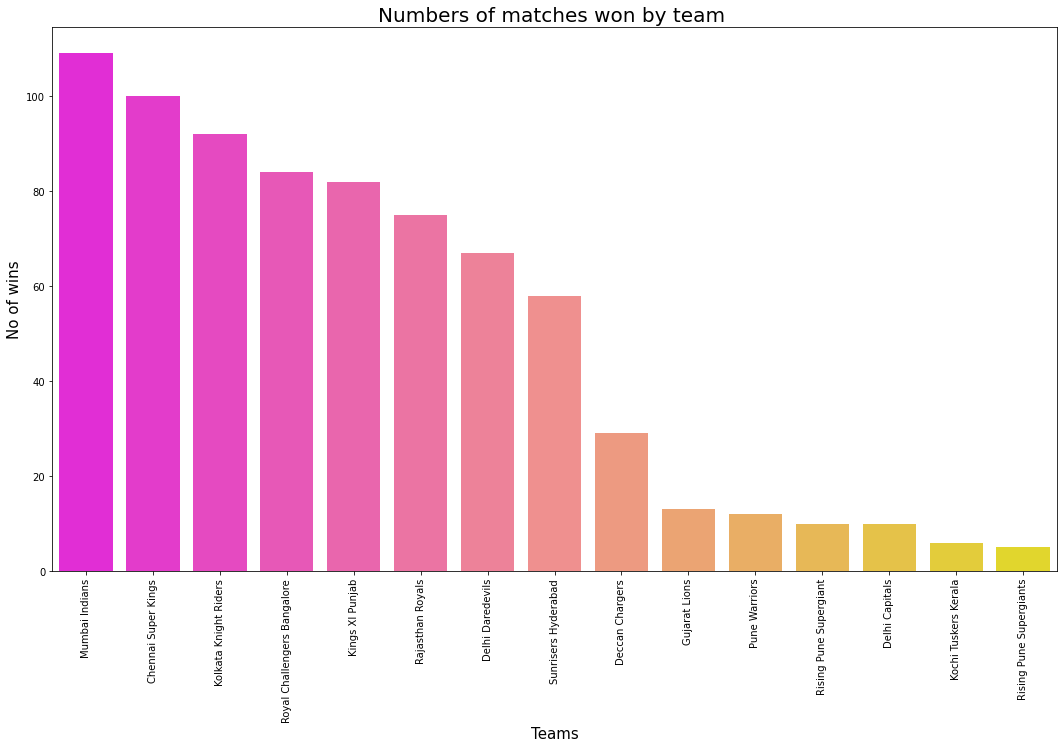

In [104]:
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=df,order=df.winner.value_counts().sort_values(ascending=False).index, palette='spring')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

- The IPL seasons have seen "Mumbai Indians" emerge as the top winner, securing victory in over 100 matches. 
- "Chennai Super Kings" holds the second position with an impressive tally of 100 wins

### Top 10 cities with Most matches

In [105]:
top_cities=df.city.value_counts().sort_values(ascending=False)[:10]

Text(0.5, 1.0, 'Top 10 Cities with Most Matches')

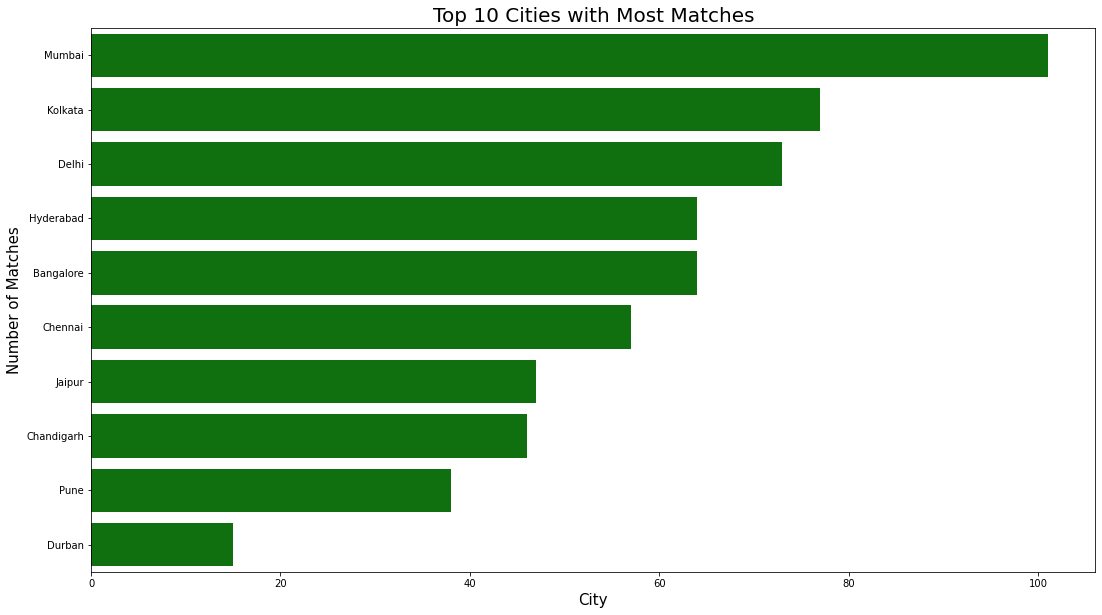

In [106]:
plt.figure(figsize=(18,10))
sns.barplot(data=df,x=top_cities,y=top_cities.index,color='green')
plt.xlabel('City',size=15)
plt.ylabel('Number of Matches',size=15)
plt.title('Top 10 Cities with Most Matches',size=20)

- Mumbai City hosted maximum number of matches

### Decisions After Winning the Toss

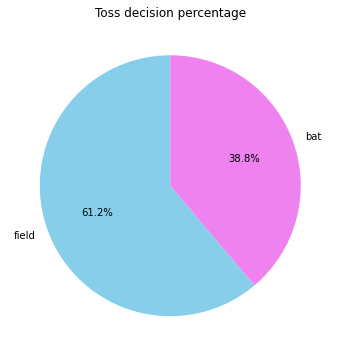

In [107]:
toss_decision=df.toss_decision.value_counts()
plt.figure(figsize=(7, 6))
labels = (np.array(toss_decision.index))
sizes = (np.array((toss_decision / toss_decision.sum())*100))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90,colors=['skyblue','violet'])
plt.title("Toss decision percentage")
plt.show()

### Top 10 venues where matches played

In [108]:
top_venues=df.venue.value_counts()[:10]

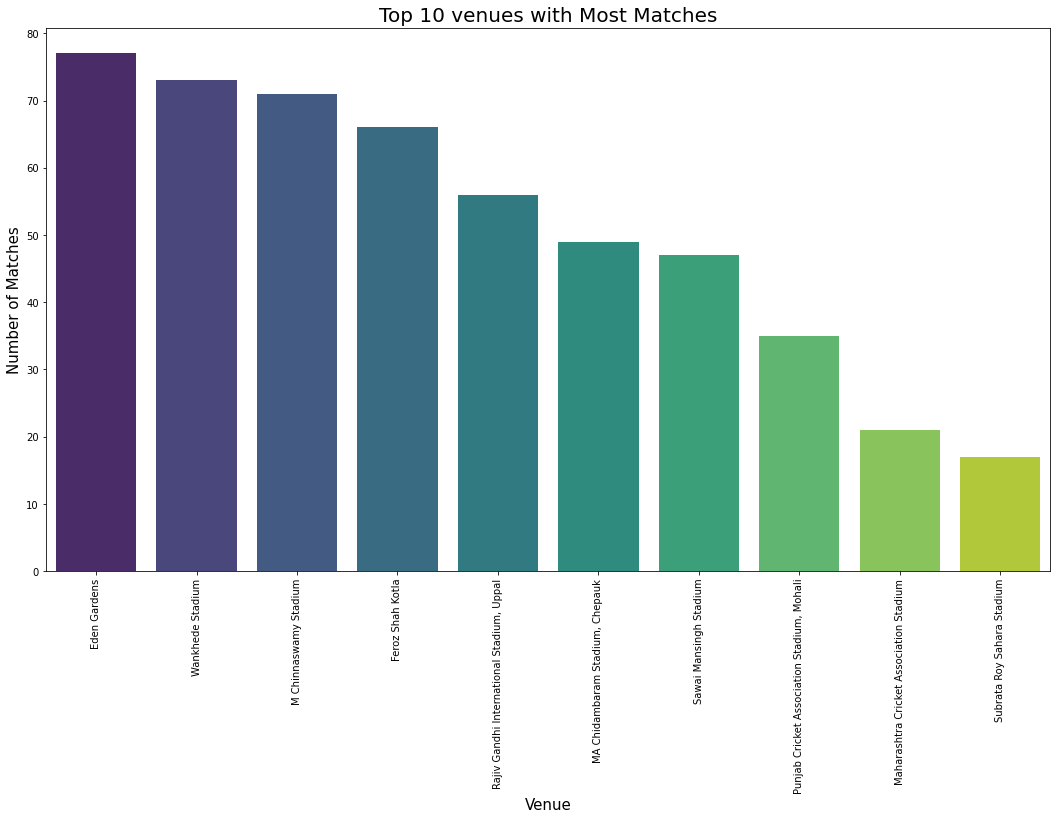

In [109]:
plt.figure(figsize=(18, 10))
sns.countplot(x='venue', data=df[df['venue'].isin(top_venues.index)], order=top_venues.index, palette='viridis')
plt.xlabel('Venue',size=15)
plt.ylabel('Number of Matches',size=15)
plt.title('Top 10 venues with Most Matches',size=20)
plt.xticks(rotation=90)
plt.show()

- Maximum number of matches are played in Eden Garden which is one of best stadiums in the world followed by Wankhede stadium
- Both are known for their electrifying atmosphere and can hold most number of crowds

### Player of the Match Analysis

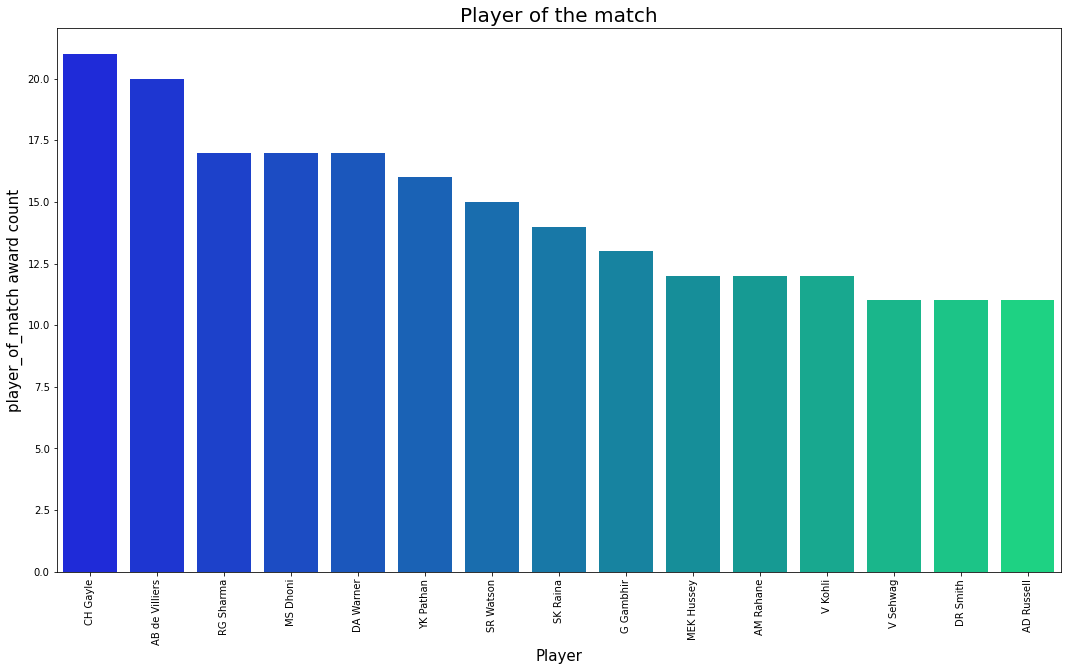

In [121]:
plt.figure(figsize=(18, 10))
top_players=df.player_of_match.value_counts()[:15]
sns.barplot(x=top_players.index, y=top_players, palette='winter')
plt.xlabel('Player',size=15)
plt.ylabel('player_of_match award count',size=15)
plt.title('Player of the match',size=20)
plt.xticks(rotation=90)
plt.show()

- Chris Gayle has clinched the title of Player of the Match 21 times followed by AB de Villiers

### Match Result VS Bat/Bowl first

In [111]:
df['win_by']=np.where(df['win_by_runs']>0,'Bat first','Bowl first')

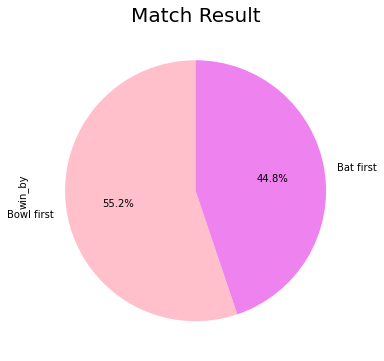

In [112]:
plt.figure(figsize=(7, 6))
df['win_by'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,colors=['pink','violet'])
plt.title("Match Result",size=20)
plt.xticks(rotation=90)
plt.show()

### Preferred Toss result

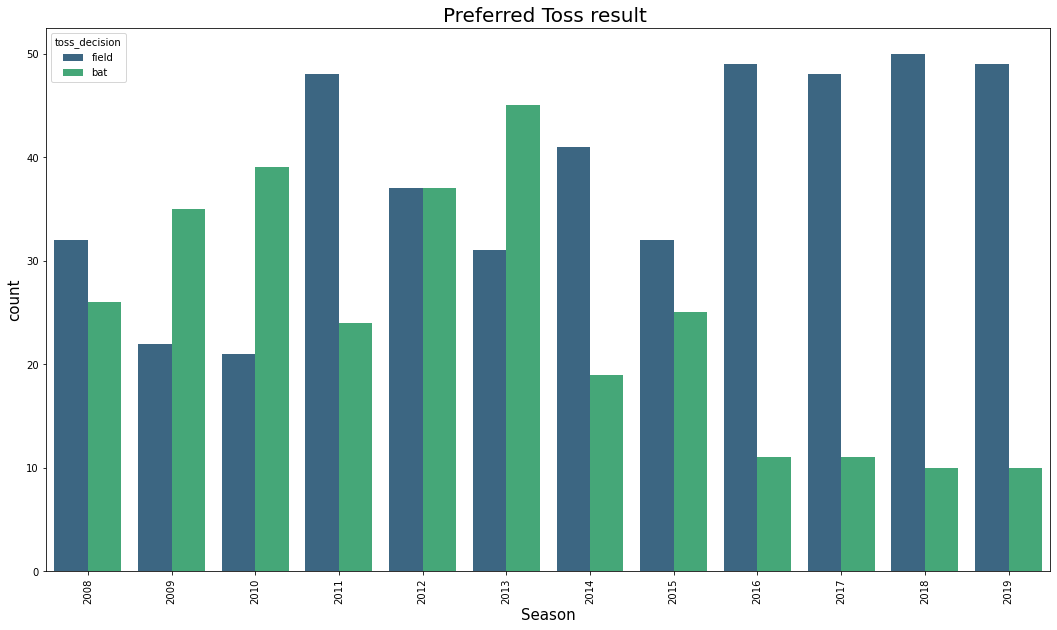

In [113]:
plt.figure(figsize = (18,10))
sns.countplot(x='season',data=df,hue='toss_decision', palette='viridis')
plt.title("Preferred Toss result ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Season",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

- Over the years except for some years mostly teams prefer to field first after winning the toss 

### Umpire with extensive IPL experience

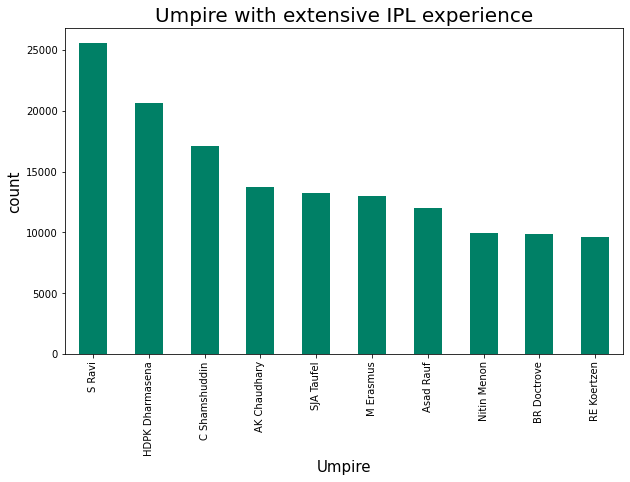

In [114]:
umpire= pd.melt(ipl, id_vars=['id'], value_vars=['umpire1', 'umpire2'])
umpire_experienced=umpire['value'].value_counts()[:10]
umpire_experienced.plot(kind='bar', figsize=(10, 6), cmap='summer')
plt.title("Umpire with extensive IPL experience",size=20)
plt.xlabel("Umpire",size=15)
plt.ylabel("count",size=15)
plt.show()

### Top 5 Teams with based on Runs Scored

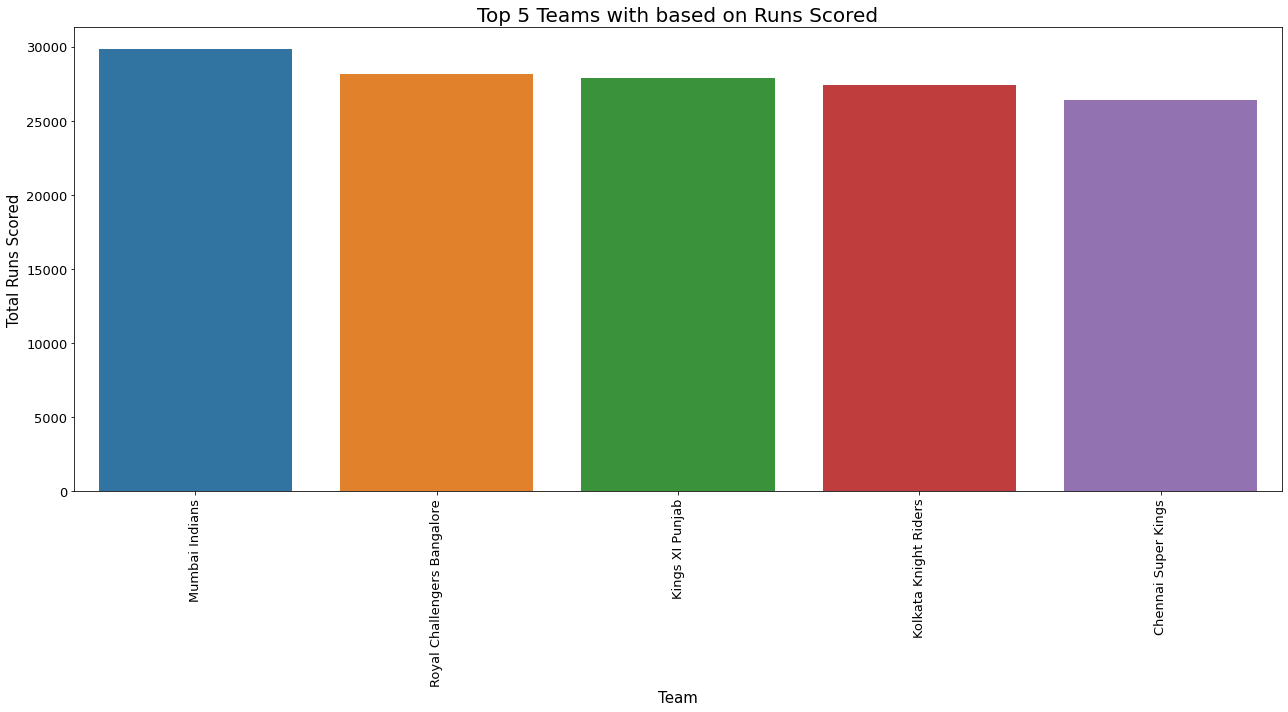

In [115]:
team_runs = ipl.groupby('batting_team')['total_runs'].sum().reset_index()

Top_5 = team_runs.sort_values(by='total_runs', ascending=False).head(5)
plt.figure(figsize=(18, 10))
sns.barplot(x='batting_team', y='total_runs', data=Top_5)
plt.title('Top 5 Teams with based on Runs Scored', size=20)
plt.xlabel('Team', size=15)
plt.ylabel('Total Runs Scored', size=15)
plt.xticks(rotation=90,size=13)
plt.yticks(size=13)
plt.tight_layout()
plt.show()

### Top 5 Batsman

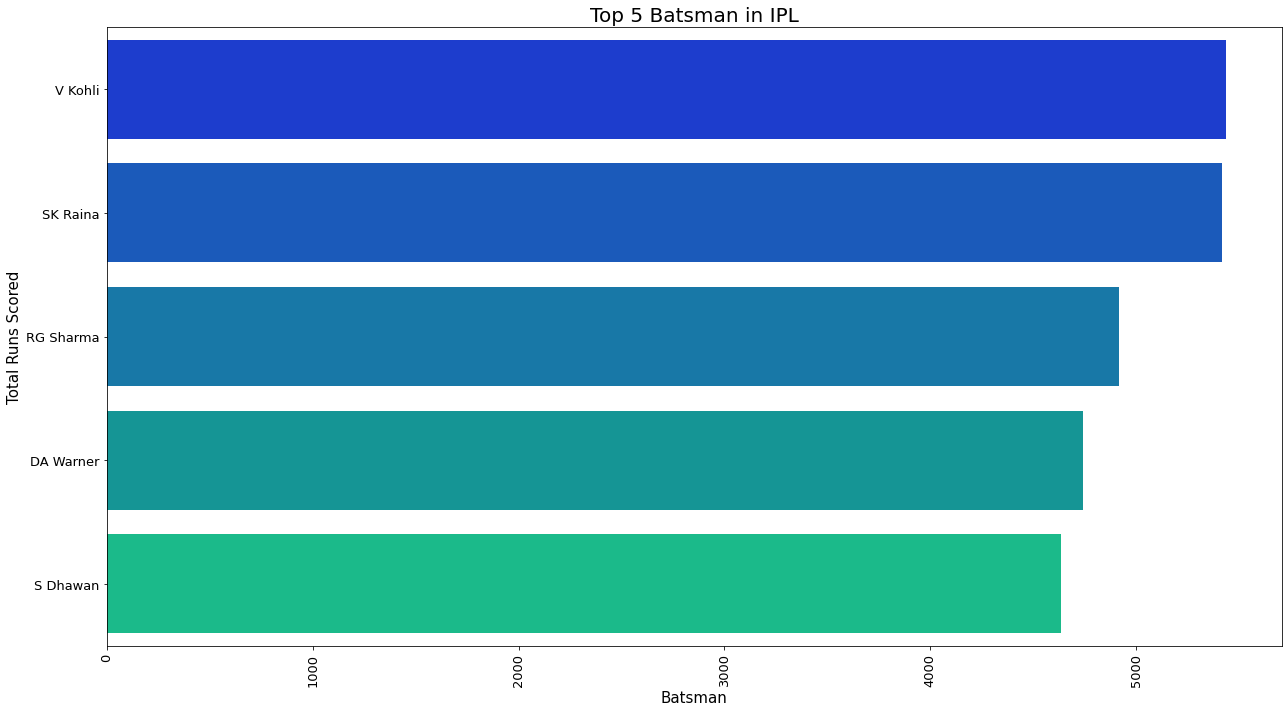

In [116]:
Batsman = ipl.groupby('batsman')['batsman_runs'].sum().reset_index()

Top_5_batsman = Batsman.sort_values(by='batsman_runs', ascending=False).head(5)
plt.figure(figsize=(18, 10))
sns.barplot(y='batsman', x='batsman_runs', data=Top_5_batsman,palette='winter')
plt.title('Top 5 Batsman in IPL', size=20)
plt.xlabel('Batsman', size=15)
plt.ylabel('Total Runs Scored', size=15)
plt.xticks(rotation=90,size=13)
plt.yticks(size=13)
plt.tight_layout()
plt.show()

### Top 5 Bowlers with most wickets

In [117]:
wicket_bowler= ipl.groupby('bowler')['dismissal_kind'].count().reset_index()
top_5_bowler=wicket_bowler.sort_values('dismissal_kind',ascending=False)[:5]

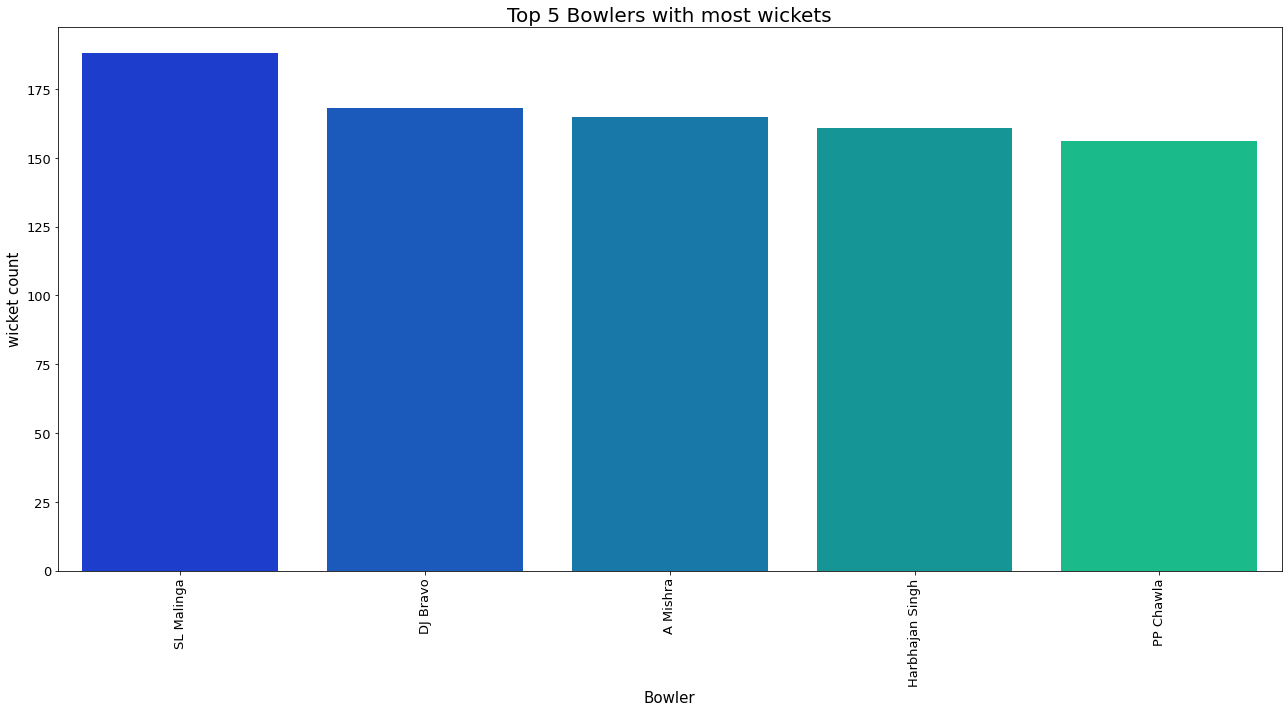

In [118]:
plt.figure(figsize=(18, 10))
sns.barplot(x='bowler', y='dismissal_kind', data=top_5_bowler,palette='winter')
plt.title('Top 5 Bowlers with most wickets', size=20)
plt.xlabel('Bowler', size=15)
plt.ylabel('wicket count', size=15)
plt.xticks(rotation=90,size=13)
plt.yticks(size=13)
plt.tight_layout()
plt.show()

### Winners of each season

In [119]:
winner_per_season= df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
winner_per_season.sort_values(by='season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


## Conclusion

- 12 seasons of IPL has been played till 2019 
-  During 2011, 2012, and 2013, more than 70 matches were played in each season, marking the highest number of matches in any individual season across all years
- Maximum number of teams participated in 2011(10) followed by 2012 and 2013
- Mumbai Indians has played maximum number of IPL matches followed by Kolkata Knight Riders
- "Mumbai Indians" have emerged as the leading champions, securing victory in more than 100 matches. Following closely, "Chennai Super Kings" holds the second position with an impressive record of 100 wins.
- Mumbai City hosted maximum number of matches followed by Kolkata and delhi
- After winning toss more teams decide to do fielding first(around 61%)
- Maximum number of matches are played in Eden Garden which is one of best stadiums in the world followed by Wankhede stadium
- Chris Gayle has been awarded the Player of the Match title 21 times, closely followed by AB de Villiers
- Teams which decide to do fielding first win the matches more then the team which bat first.
- Mumbai Indians, Royal Challengers Bangalore, Kings XI Punjab, Kolkata Knight Riders, and Chennai Super Kings are the leading teams in the IPL season scoring more than 25,000 runs
- V Kohli, SK Raina, RG Sharma, DA Warner, and S Dhawan are the leading run-scorers in the IPL season, ranking within the top five
- SL Malinga, DJ Bravo, A Mishra, Harbhajan Singh, and PP Chawla are the top five bowlers with the highest number of wickets in the IPL season
- Throughout the span of 12 seasons, Mumbai Indians have emerged as the most victorious team in the IPL, securing the title 4 times. Chennai Super Kings, with 3 championships, closely trails as the second most successful team in terms of the number of wins


### Recommendations

- Mumbai Indians, Royal Challengers Bangalore, Kings XI Punjab, Kolkata Knight Riders, and Chennai Super Kings are the leading teams in the IPL  and they can be leveraged to promote products, symbolizing excellence and winning spirit
- Leading run scorers like V Kohli, SK Raina, RG Sharma, DA Warner, and S Dhawan and bolwers like SL Malinga, DJ Bravo, A Mishra, Harbhajan Singh, and PP Chawla can be approached to enhance your brand image
- Chris Gayle, with his numerous Player of the Match awards, exudes charisma and showcases exceptional talent, making him a compelling choice for endorsements. Similarly, AB de Villiers, with his outstanding performance and remarkable skills, adds to the allure, creating a strong appeal for brand endorsements
- Eden Gardens and Wankhede Stadium: These iconic venues can symbolize tradition and grandeur, making them suitable for promoting products associated with heritage and luxury.
- Being a prominent host city, Mumbai's vibrant and diverse image can enhance the appeal of products related to lifestyle, fashion, or entertainment.

